### 04. Logistic Regression 

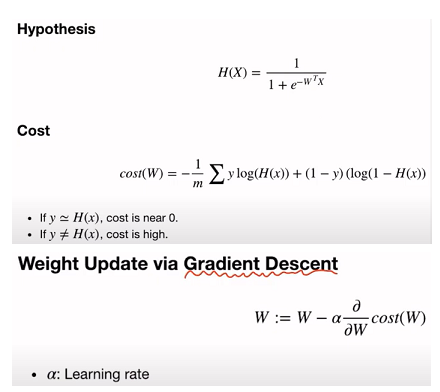

In [12]:
from IPython.display import Image
Image('img/theory_logistic.PNG')

In [14]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim 
## 6x2 dataset & binary result 
x_data = [
    [1,2], [2,3], [3,1], [4,3], [5,3], [6,2]
]
y_data = [
    [0], [0], [0], [1], [1], [1]
]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


- 1) 로지스틱의 H(x), cost 함수를 수식을 그대로 표현하는 방식 

In [21]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))
    cost = -(y_train * torch.log(hypothesis) + 
             (1 - y_train) * torch.log(1 - hypothesis)).mean()
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


- 2) H(x)는 sigmid, cost function은 binary_cross_entropy로 간략하게 

In [26]:
# 모델 초기화
w = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([w, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    hypothesis = torch.sigmoid(x_train.matmul(w)+b)
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    optimizer.zero_grad()   ##기존 gradient 초기화 
    cost.backward()
    optimizer.step()        ## cost를 최소화 하라 

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


- 실전 코드 

In [29]:
## loading the dataset 
import numpy as np
xy = np.loadtxt('data/data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

print(x_train[0:5])
print(y_train[0:5])

tensor([[-0.2941,  0.4874,  0.1803, -0.2929,  0.0000,  0.0015, -0.5312, -0.0333],
        [-0.8824, -0.1457,  0.0820, -0.4141,  0.0000, -0.2072, -0.7669, -0.6667],
        [-0.0588,  0.8392,  0.0492,  0.0000,  0.0000, -0.3055, -0.4927, -0.6333],
        [-0.8824, -0.1055,  0.0820, -0.5354, -0.7778, -0.1624, -0.9240,  0.0000],
        [ 0.0000,  0.3769, -0.3443, -0.2929, -0.6028,  0.2846,  0.8873, -0.6000]])
tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.]])


In [30]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [34]:
model = BinaryClassifier()
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    hypothesis = model(x_train)
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    optimizer.zero_grad()   ##기존 gradient 초기화 
    cost.backward()
    optimizer.step()        ## cost를 최소화 하라 

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) ## H(x) >= 0.5 이면 prediction = True(1)
        correct_prediction = prediction.float() == y_train  ## prediction값과 y_train이 일치하면 correct_ = True(1)
        accuracy = correct_prediction.sum().item() / len(correct_prediction) ## correct_prediction값의 평균 
        
        print('epoch {}/{}  Cost: {:.4f}  Accuracy: {:2.2f}%'.format(
            epoch, nb_epochs, cost.item(), accuracy*100 ))

epoch 0/1000  Cost: 0.7682  Accuracy: 32.02%
epoch 100/1000  Cost: 0.4818  Accuracy: 76.68%
epoch 200/1000  Cost: 0.4741  Accuracy: 76.94%
epoch 300/1000  Cost: 0.4726  Accuracy: 77.34%
epoch 400/1000  Cost: 0.4721  Accuracy: 77.08%
epoch 500/1000  Cost: 0.4719  Accuracy: 76.94%
epoch 600/1000  Cost: 0.4718  Accuracy: 76.68%
epoch 700/1000  Cost: 0.4717  Accuracy: 76.81%
epoch 800/1000  Cost: 0.4717  Accuracy: 76.94%
epoch 900/1000  Cost: 0.4717  Accuracy: 76.94%
epoch 1000/1000  Cost: 0.4717  Accuracy: 76.94%
